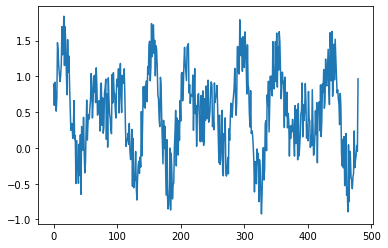

700 Hz	- 9014.11
800 Hz	- 6079.49
900 Hz	- 5684.08
1000 Hz	- 9327.69
1100 Hz	- 6626.45
1200 Hz	- 1531.22
1300 Hz	- 2433.53
1400 Hz	- 1129.82
Frequency #1 is 1000 Hz!
Frequency #2 is 700 Hz!
Average: 5228.29723880913
Std Dev: 3006.2670126735493
Cutoff: 8234.56425148268


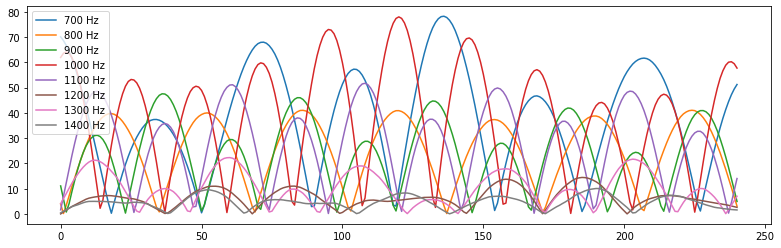

: 

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import random
%matplotlib inline

def test_freq(f, t_f, sig):
    analytic_pulse = np.sin(2 * np.pi * f * t_f)
    c = np.correlate(sig, analytic_pulse)
    return c
    envelope = (signal.hilbert(c))
    return envelope

random.seed()
noise = lambda : 0.5 * random.random()
offset = 0
t = np.linspace(0, 0.01-offset/48_000, 480-offset)
tone = np.append(np.zeros(offset), 
    0.5 * np.sin(2 * np.pi * 1000 * t)
    + 0.5 * np.sin(2 * np.pi * 700 * t)
    )
for i in range(0, 480):
    tone[i] += 1.00 * random.random()

plt.plot(tone)
plt.show()

width, height = plt.figaspect(0.3)
fig = plt.figure(figsize=(width,height))

t_f = np.linspace(0, 0.005, 240)
max_vals = [0, 0]
freqs = [0, 0]
outputs = []
for f in range(700, 1500, 100):
    out = test_freq(f, t_f, tone)
    outputs.append(sum(abs(out)))
    #print(f"{f} Hz - {out}")
    print(f"{f} Hz\t- {sum(abs(out)):.2f}")
    if sum(abs(out)) > max_vals[0]:
        max_vals[1] = max_vals[0]
        freqs[1] = freqs[0] 
        max_vals[0] = sum(abs(out))
        freqs[0] = f
    elif sum(abs(out)) > max_vals[1]:
        max_vals[1] = sum(abs(out))
        freqs[1] = f
    #plt.plot(out.real)
    #plt.plot(out.imag)
    plt.plot(abs(out), label=f"{f} Hz")

print(f"Frequency #1 is {freqs[0]} Hz!")
print(f"Frequency #2 is {freqs[1]} Hz!")
print(f"Average: {np.average(outputs)}")
print(f"Std Dev: {np.std(outputs)}")
print(f"Cutoff: {np.average(outputs) + np.std(outputs)}")
plt.legend()
plt.show()

700 Hz


C:\Users\berna\AppData\Local\Temp\ipykernel_13556\4073964149.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


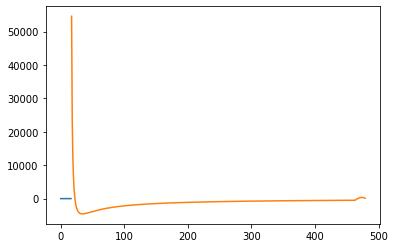

800 Hz


C:\Users\berna\AppData\Local\Temp\ipykernel_13556\4073964149.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


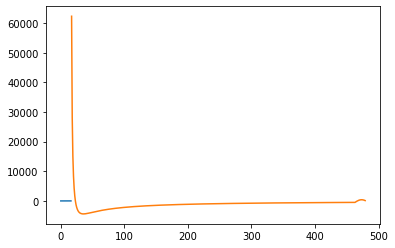

C:\Users\berna\AppData\Local\Temp\ipykernel_13556\4073964149.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


900 Hz


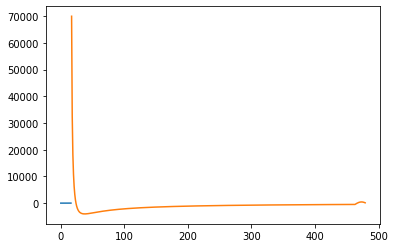

C:\Users\berna\AppData\Local\Temp\ipykernel_13556\4073964149.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


1000 Hz


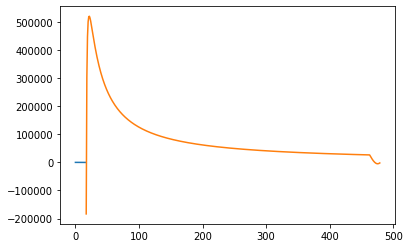

C:\Users\berna\AppData\Local\Temp\ipykernel_13556\4073964149.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


1100 Hz


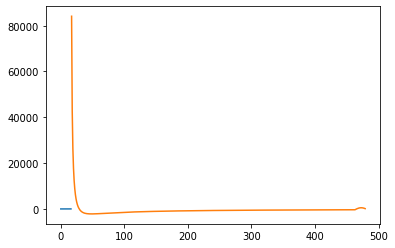

C:\Users\berna\AppData\Local\Temp\ipykernel_13556\4073964149.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


1200 Hz


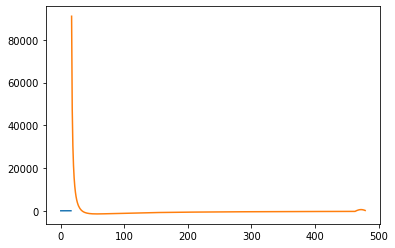

1300 Hz


C:\Users\berna\AppData\Local\Temp\ipykernel_13556\4073964149.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


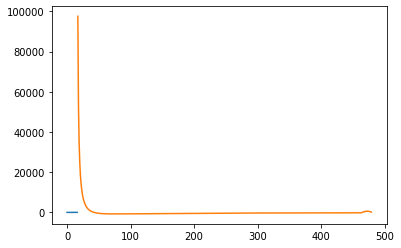

1400 Hz


C:\Users\berna\AppData\Local\Temp\ipykernel_13556\4073964149.py:2: RuntimeWarning: divide by zero encountered in true_divide
  inverse_pi = 1.0/np.pi / space


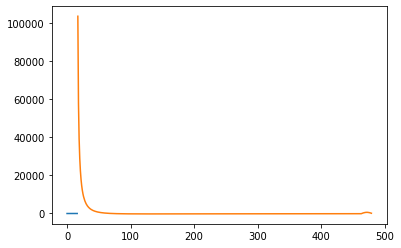

In [7]:
def own_hilbert(sig, space):
    inverse_pi = 1.0/np.pi / space
    return np.convolve(sig, inverse_pi)

def test_freq(f, t_f, sig):
    analytic_pulse = 0.5 * np.sin(2 * np.pi * f * t_f)
    c = np.correlate(sig, analytic_pulse)
    imag = own_hilbert(c, t_f)
    return c, imag

t = np.linspace(0, 0.01, 480)
tone = np.append(np.zeros(0), np.sin(2 * np.pi * 1000 * t))

t_f = np.linspace(0, 0.01-(0.01*16/480), 464)
for f in range(700, 1500, 100):
    real, imag = test_freq(f, t_f, tone)
    #print(f"{f} Hz - {out}")
    print(f"{f} Hz")
    plt.plot(real)
    plt.plot(imag)
    plt.show()